# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [13]:
import numpy as np
from PIL import Image
images = []
for i in range(1, 9):
    img = Image.open(f'images/0{i}.png')
    img = np.array(img)
    img = img / 255
    img = img.flatten()
    images.append(img)
images = np.array(images)


### 2. Compute the mean of the images. 

In [14]:
mean_image = np.mean(images, axis=0)

### 3. Normalize the images by subtracting the mean from each image.

In [15]:
# write your code here
normalized_images = images - mean_image

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [16]:
# write your code here
weights = np.load('coefs.npy')
bias = np.load('bias.npy')
z = np.dot(normalized_images, weights) + bias
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [18]:
# write your code here 
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = np.argmax(y_hat, axis=1)
y_true = np.array([0, 0, 1, 1, 2, 2, 3, 3])
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(y_pred)

Accuracy: 0.88
[0 0 1 1 2 2 3 2]


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [12]:
# write your code here
labels = {0: 'Cat', 1: 'Dog', 2: 'Frog', 3: 'Horse'}
y_pred = np.argmax(y_hat, axis=1)
for i in range(len(y_pred)):
    print(f'Image {i} is a {labels[y_pred[i]]}')

Image 0 is a Cat
Image 1 is a Cat
Image 2 is a Dog
Image 3 is a Dog
Image 4 is a Frog
Image 5 is a Frog
Image 6 is a Cat
Image 7 is a Frog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

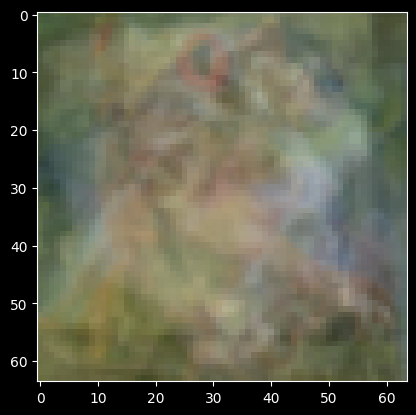

In [12]:
# write your code here
import matplotlib.pyplot as plt
plt.imshow(np.uint8(mean_image.reshape(64, 64, 3) * 255))
plt.show()